In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as seabn

#Forest Fire Model will be use to create the animation and plot

# Set the seed for pseudo-randomness
np.random.seed(7)

# Function to initialize the simulation grid
def initialize_simulation(num_steps, initial_state):
    """
    Initialize the grid with the initial state of the system and create an empty array to store the state at each time step.
    
    The function would take the arguments:
        num_steps (int): Number of time steps in the simulation.
        initial_state (np.ndarray): The 2-dimensional initial state of the model.

    The function would Return:
        np.ndarray: A 2-dimensional array to store the state at each time step, starting with the initial state.
    """
    # Create an empty grid with the same shape as the initial state
    simulation_grid = np.zeros((num_steps, *initial_state.shape), dtype=np.int32)
    # Set the initial state as the first step of the simulation
    simulation_grid[0] = initial_state
    return simulation_grid

# Function to update the simulation grid based on forest-fire rules
def update_simulation(previous_grid, lightning_probability, wind_effect_probability, tree_growth_probability):
    """
    Update the state of the grid based on the previous state, following the four forest-fire rules in order.
    
    The function would takes arguments:
        previous_grid (np.ndarray): The previous 2-dimensional state of the grid.
        lightning_probability (float): The probability of a tree catching fire due to lightning strike.
        wind_effect_probability (float): The probability of a fire accelerating due to wind effects.
        tree_growth_probability (float): The probability of an empty space becoming a tree due to tree growth.
    
    Function Return:
        np.ndarray: The new, updated, 2-dimensional state of the grid.
    """
    # Create a copy of the previous grid to store the updated state
    updated_grid = np.copy(previous_grid)
    
    # Loop through each cell in the grid
    for x in range(previous_grid.shape[0]):
        for y in range(previous_grid.shape[1]):
            # Get the current cell state
            current_cell = previous_grid[x, y]
            
            # Determine the state of neighboring cells
            neighbor_above = previous_grid[x-1, y] if x > 0 else 0
            neighbor_below = previous_grid[x+1, y] if x < previous_grid.shape[0]-1 else 0
            neighbor_left = previous_grid[x, y-1] if y > 0 else 0
            neighbor_right = previous_grid[x, y+1] if y < previous_grid.shape[1]-1 else 0
            
            # Create a list of neighbor states
            neighbors = [neighbor_above, neighbor_below, neighbor_left, neighbor_right]
            
            # Apply forest-fire rules to update the cell state
            if current_cell == 2:
                # Rule 1: A burning cell in the previous time step turns into an empty cell
                updated_grid[x, y] = 0
               
            elif current_cell == 1:
                if 2 in neighbors:
                    # Rule 2: A tree will start burning if at least one neighbor is burning
                    updated_grid[x, y] = 2
                elif np.random.random() < lightning_probability:
                    # Rule 3: A tree turns into fire due to lightning probability
                    updated_grid[x, y] = 2
                elif np.random.random() < wind_effect_probability:
                    # Rule 5: The fire will accelerate due to wind effects probability
                    updated_grid[x, y] = 3
            elif np.random.random() < tree_growth_probability:
                # Rule 4: An empty space fills with a tree due to tree growth probability
                updated_grid[x, y] = 1
                    
            else:
                # Cell remains unchanged if no rules match
                updated_grid[x, y] = previous_grid[x, y]
                    
    return updated_grid

# Function to run the simulation for a given number of steps
def run_simulation_steps(num_steps, initial_state, lightning_probability, wind_effect_probability, tree_growth_probability):
    """
    Run the forest fire simulation for a given number of steps.
    
    Function takes arguments:
        num_steps (int): Number of time steps that the simulation will run for.
        initial_state (np.ndarray): The 2-dimensional initial state of the forest.
        lightning_probability (float): The probability of a tree catching fire due to lightning.
        wind_effect_probability (float): The probability of a fire accelerating due to wind effects.
        tree_growth_probability (float): The probability of an empty space becoming a tree due to tree growth.

    Function Returns: 
        np.ndarray: The overall state for the forest fire simulation.
    """
    # Initialize the simulation grid
    simulation_state = initialize_simulation(num_steps, initial_state)
    
    # Iterate through each time step
    for t in range(1, num_steps):
        # Update the simulation grid based on the previous state
        simulation_state[t] = update_simulation(simulation_state[t-1], lightning_probability, wind_effect_probability, tree_growth_probability)
        
    return simulation_state

# Parameters for the forest fire simulation
lightning_probability = 0.2  # Probability of a tree catching fire due to lightning strike.
wind_effect_probability = 0.1 # The probability of a fire accelerating due to wind effects.
tree_growth_probability = 0.5  # Probability of an empty space becoming a tree due to tree growth.

# The fraction of the forest covered by trees
initial_tree_fraction = 0.5

# The initial state of the forest, a 100x100 grid filled with empty (0) and tree (1) cells
initial_forest_state = np.random.binomial(1, initial_tree_fraction, size=(100, 100))

# The number of time steps (t) that the simulation will run for
num_simulation_steps = 200

# Run the forest fire simulation and save the resulting grid
forest_simulation_grid = run_simulation_steps(num_simulation_steps, initial_forest_state, lightning_probability, wind_effect_probability, tree_growth_probability)

# Save the numpy grid to file "forest_simulation.npz"
np.savez_compressed("Forest_Fire_Model", simulation_state=forest_simulation_grid)


#***************************************************************************************************************************************

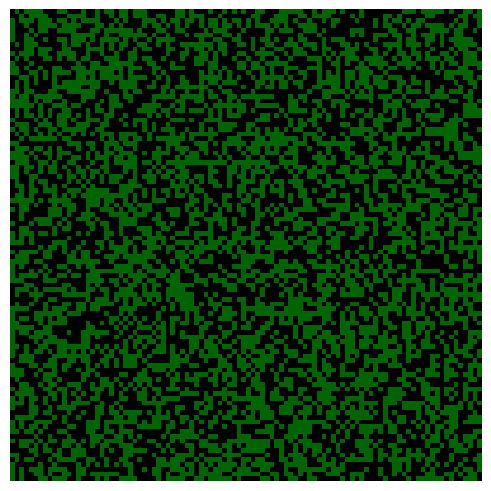

In [113]:
#Forest Fire Model Animation

# Loading forest fire simulation
with np.load("Forest_Fire_Model.npz") as forest_grid:
    forest_grid = forest_grid["simulation_state"]
    
# Setting up the initial figure and axes
fig, ax = plt.subplots(constrained_layout=True)
ax.axis("off")

# Set colours for states 0 (empty), 1 (tree) and 2 (fire) respectively
cmap = ListedColormap(["black", "darkgreen", "red"])

# Plot the initial grid
grid_plot = ax.imshow(
    forest_grid[0],
    vmin=forest_grid.min(),
    vmax=forest_grid.max(),
    animated=True,
    cmap=cmap
)

# Animating the state of each grid (number of grids dependent on number of steps)
def animate(xy):
    grid_plot.set_array(forest_grid[xy])
    return [grid_plot]

# Creating animation object, interval set to 100ms 
anim = FuncAnimation(fig, animate, frames=len(forest_grid), interval=100)

# Displaying animation in Jupyter Notebook
HTML(anim.to_jshtml())

#**********************************************************************************************************************************************************************

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


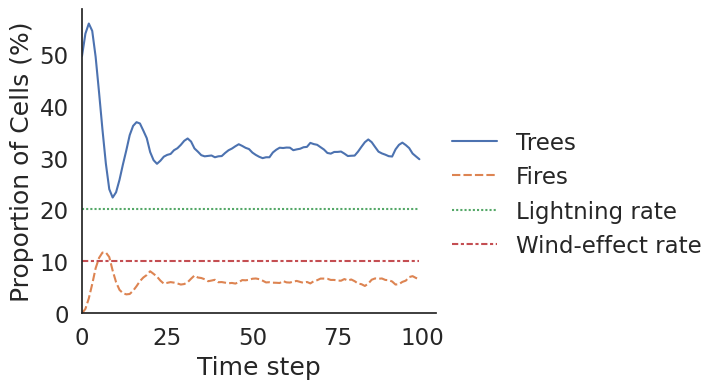

In [100]:
#Forest Fire Model Plot
#Run cell to get plot
with np.load("Forest_Fire_Model.npz") as forest_grid:
    forest_grid = forest_grid["simulation_state"]

# Creating empty list for trees and fires
num_trees_array = []
num_fires_array = []

# looping over each time step in state (grid)
for grid_state in forest_grid:
    # Calculating total number of cells in the grid 
    total_cells = grid_state.shape[0]*grid_state.shape[1]
    
    # Counting trees, then calculating percentage coverage
    trees = np.count_nonzero(grid_state == 1)/(total_cells)*100
    num_trees_array.append(trees)
    
    # Counting fires, then calculating percentage coverage
    fires = np.count_nonzero(grid_state == 2)/(total_cells)*100
    num_fires_array.append(fires)

# Lightning rate (probility f) calculated as a percentage
lightning_strike = lightning_probability*100

# wind_effect rate (probility w) calculated as a percentage
wind_effect = wind_effect_probability*100

# Creating dataframe
forestfire_model = pd.DataFrame({"Trees" : num_trees, "Fires" : num_fires, "Lightning rate" : lightning_strike, "Wind-effect rate" : wind_effect})
forestfire_model.index.name = "Time step"

# Setting size of figure, style and font size 
seabn.set(style = "white", font_scale=1.5)

# Plotting the data
plot = seabn.relplot(data=forestfire_model, kind="line").set(
    xlim=(0, None), 
    ylim=(0, None), 
    ylabel="Proportion of Cells (%)"
)

# Set figure size (inches)
plot.fig.set_size_inches(8, 4)

# Saving output as a png (picture) file
plt.savefig('forest_fire_plot.png')